In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# api to fetch the ds from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 78% 63.0M/80.9M [00:01<00:00, 49.6MB/s]
100% 80.9M/80.9M [00:01<00:00, 63.5MB/s]


In [5]:
# Extractibg the compressed Dataset
from zipfile import ZipFile
dataset = "sentiment140.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [6]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data processing

In [9]:
#loading dataset
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [10]:
#to check number of rows and colums
twitter_data.shape

(1599999, 6)

In [11]:
#printing the first 5 rows of the DF
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
#naming the columns and reading the dataset
twitter_data.columns = ['target','id','date','flag','user','tweet']
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [14]:
twitter_data.shape

(1599999, 6)

In [15]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [16]:
# Naming the columns and read the data
column_names = ['target','id','date','flag','user','text']
twitter_data = pd.read_csv('training.1600000.processed.noemoticon.csv',names=column_names, encoding='ISO-8859-1')

In [18]:
twitter_data.shape

(1600000, 6)

In [19]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [20]:
#checking the missing values
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [21]:
#checking the distribution of traget column
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [24]:
# convert lable 4 to 1
# 0 is negative and 1 is positive
twitter_data.replace({'target':{4:1}},inplace=True)

In [25]:
#checking the distribution of traget column
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0 is negative and 1 is positive

Stemming: It is a process of reducing a word to its root word


For Instance, actor,actress,acting = act

In [26]:
port_stem = PorterStemmer()

In [27]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [28]:
twitter_data['stemmed_content'] = twitter_data['text'].apply(stemming)


*# stemming might take 50 to 60 minutes*


In [30]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [33]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [34]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [35]:
from tkinter import Y
#separating the data and label
X = twitter_data['stemmed_content'].values
Y = twitter_data['target'].values

In [36]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [37]:
print(Y)

[0 0 0 ... 1 1 1]


In [38]:
#Splitting the data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
# size=0.2 means 20 percent as test data and remaing 80 is train
#stratify=Y is used to divide 0 and 1 equally

In [39]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [40]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [41]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [42]:
#Converting the textual data to numerical data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [43]:
print(X_train)

  (0, 443066)	0.4484755317023172
  (0, 235045)	0.41996827700291095
  (0, 109306)	0.3753708587402299
  (0, 185193)	0.5277679060576009
  (0, 354543)	0.3588091611460021
  (0, 436713)	0.27259876264838384
  (1, 160636)	1.0
  (2, 288470)	0.16786949597862733
  (2, 132311)	0.2028971570399794
  (2, 150715)	0.18803850583207948
  (2, 178061)	0.1619010109445149
  (2, 409143)	0.15169282335109835
  (2, 266729)	0.24123230668976975
  (2, 443430)	0.3348599670252845
  (2, 77929)	0.31284080750346344
  (2, 433560)	0.3296595898028565
  (2, 406399)	0.32105459490875526
  (2, 129411)	0.29074192727957143
  (2, 407301)	0.18709338684973031
  (2, 124484)	0.1892155960801415
  (2, 109306)	0.4591176413728317
  (3, 172421)	0.37464146922154384
  (3, 411528)	0.27089772444087873
  (3, 388626)	0.3940776331458846
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 390130)	0.22064742191076112
  (1279996, 434014)	0.2718945052332447
  (1279996, 318303)	0.21254698865277746
  (1279996, 237899)	0.2236567560099234
  (1279996, 2910

In [44]:
print(X_test)

  (0, 420984)	0.17915624523539803
  (0, 409143)	0.31430470598079707
  (0, 398906)	0.3491043873264267
  (0, 388348)	0.21985076072061738
  (0, 279082)	0.1782518010910344
  (0, 271016)	0.4535662391658828
  (0, 171378)	0.2805816206356073
  (0, 138164)	0.23688292264071403
  (0, 132364)	0.25525488955578596
  (0, 106069)	0.3655545001090455
  (0, 67828)	0.26800375270827315
  (0, 31168)	0.16247724180521766
  (0, 15110)	0.1719352837797837
  (1, 366203)	0.24595562404108307
  (1, 348135)	0.4739279595416274
  (1, 256777)	0.28751585696559306
  (1, 217562)	0.40288153995289894
  (1, 145393)	0.575262969264869
  (1, 15110)	0.211037449588008
  (1, 6463)	0.30733520460524466
  (2, 400621)	0.4317732461913093
  (2, 256834)	0.2564939661498776
  (2, 183312)	0.5892069252021465
  (2, 89448)	0.36340369428387626
  (2, 34401)	0.37916255084357414
  :	:
  (319994, 123278)	0.4530341382559843
  (319995, 444934)	0.3211092817599261
  (319995, 420984)	0.22631428606830145
  (319995, 416257)	0.23816465111736276
  (319995, 3

*Training the ML Model (Logestic Regression)*

In [45]:
model = LogisticRegression(max_iter=1000)

In [46]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

Model Evaluation

Accuracy Score


In [47]:
#Accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [48]:
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.81018984375


In [49]:
#Accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [50]:
print('Accuracy score of the test data : ',test_data_accuracy)

Accuracy score of the test data :  0.7780375


In [51]:
#saving the trained model
import pickle

In [52]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [53]:
#load the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [54]:
X_new = X_test[200]
print(Y_test[200])
prediction = model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('The Tweet is negative')
else:
  print('The Tweet is positive')

1
[1]
The Tweet is positive


In [55]:
X_new = X_test[3]
print(Y_test[3])
prediction = model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('The Tweet is negative')
else:
  print('The Tweet is positive')

0
[0]
The Tweet is negative


<ipython-input-60-8844442687fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=twitter_data, palette='viridis')


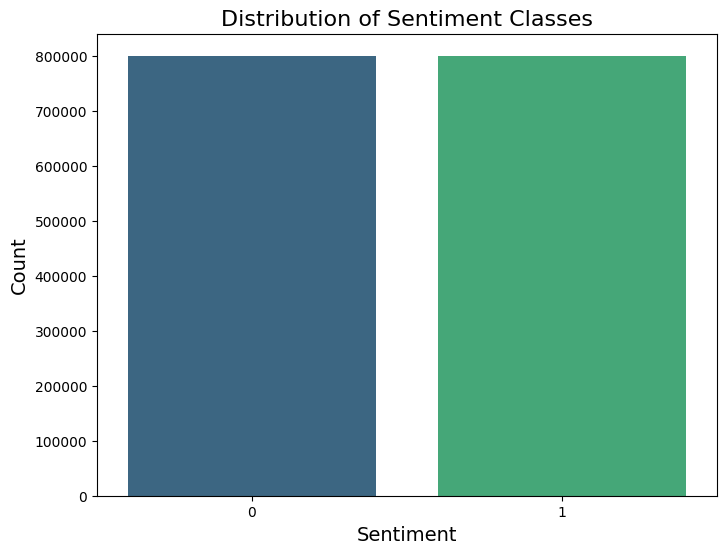

In [60]:
import seaborn as sns

# Set the color palette
sns.set_palette("pastel")

# Plot the distribution of sentiment classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=twitter_data, palette='viridis')
plt.title('Distribution of Sentiment Classes', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()



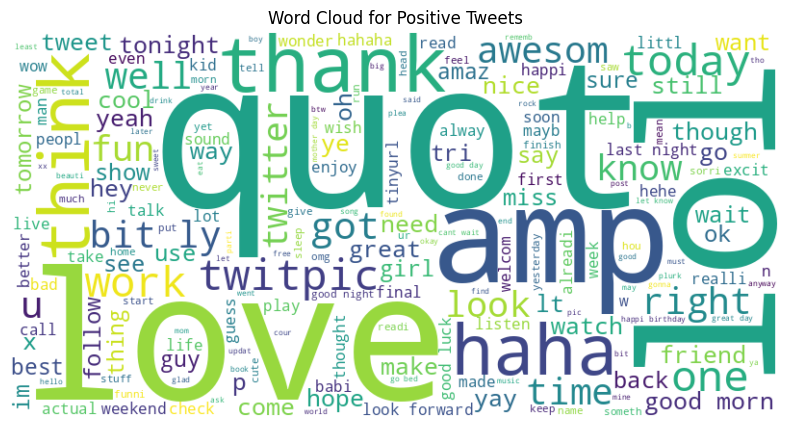

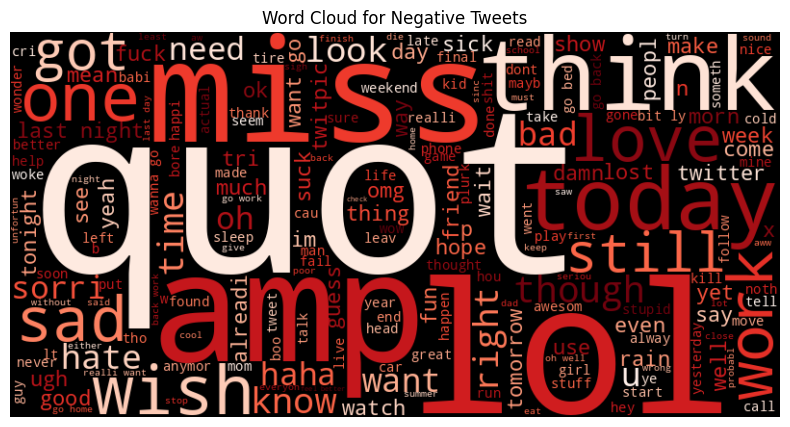

In [57]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative tweets
positive_tweets = ' '.join(twitter_data[twitter_data['target'] == 1]['stemmed_content'])
negative_tweets = ' '.join(twitter_data[twitter_data['target'] == 0]['stemmed_content'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_tweets)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Tweets')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Tweets')
plt.axis('off')
plt.show()


<ipython-input-58-3cc51610011a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_features, palette='coolwarm')


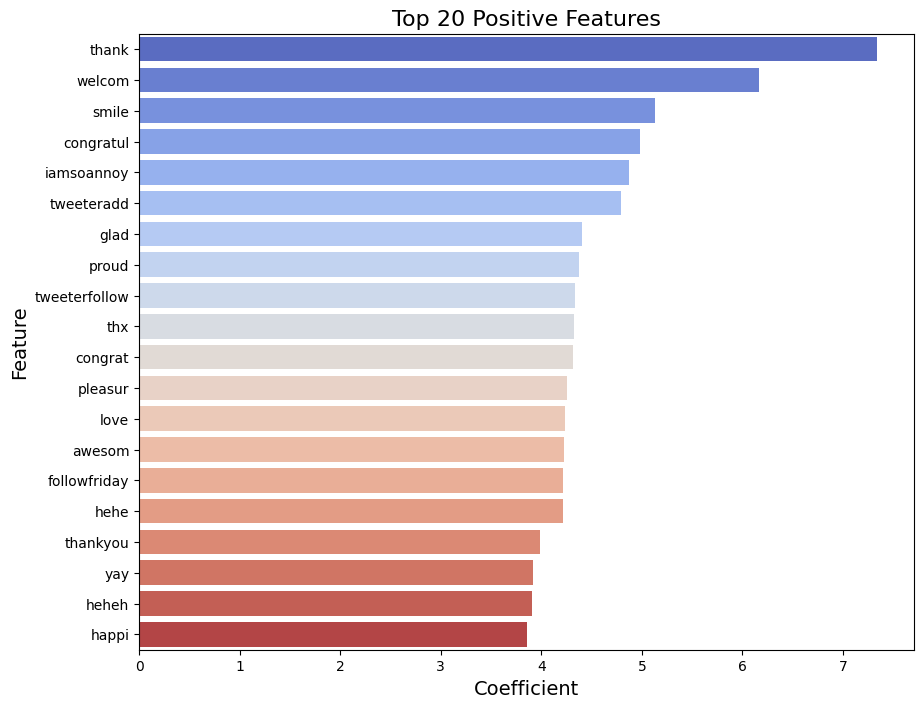

<ipython-input-58-3cc51610011a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=bottom_features, palette='coolwarm')


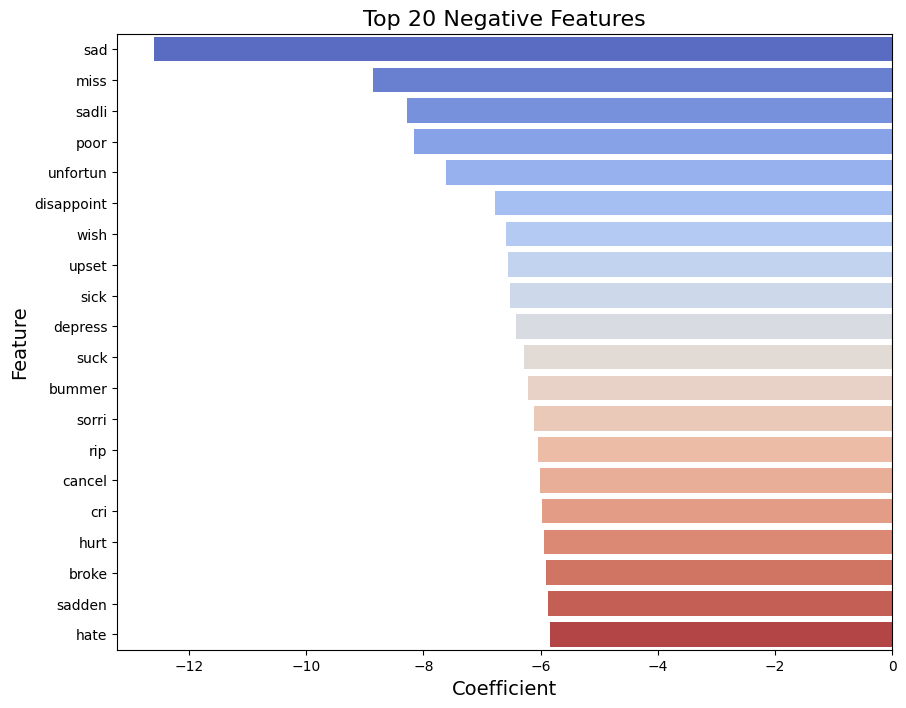

In [58]:
# Extract feature names and their corresponding coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_.flatten()

# Create a dataframe for feature importance
feature_importance = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
top_features = feature_importance.nlargest(20, 'coefficient')
bottom_features = feature_importance.nsmallest(20, 'coefficient')

# Plot top positive features
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficient', y='feature', data=top_features, palette='coolwarm')
plt.title('Top 20 Positive Features', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

# Plot top negative features
plt.figure(figsize=(10, 8))
sns.barplot(x='coefficient', y='feature', data=bottom_features, palette='coolwarm')
plt.title('Top 20 Negative Features', fontsize=16)
plt.xlabel('Coefficient', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


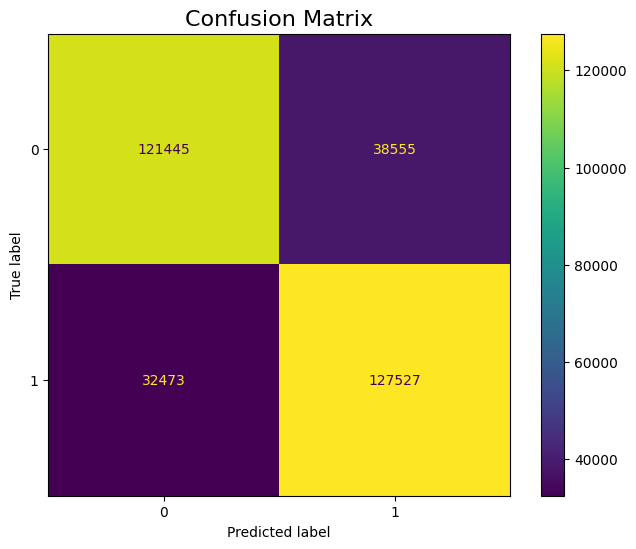

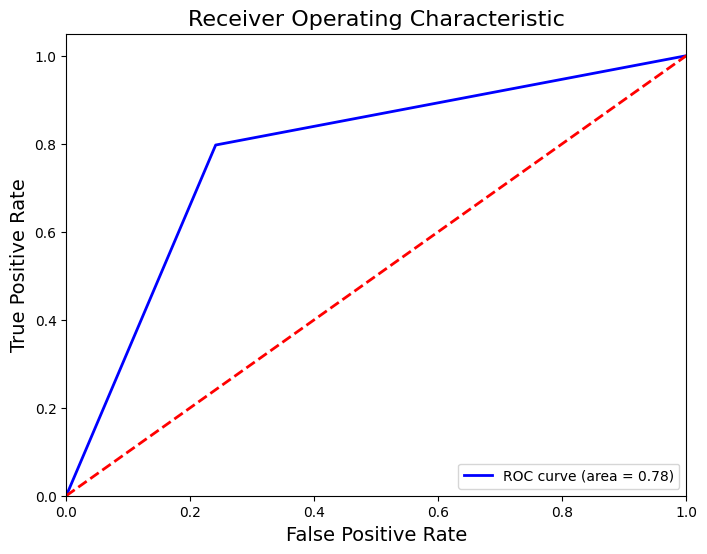

In [59]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Plot confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='viridis')
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, X_test_prediction)
roc_auc = roc_auc_score(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right")
plt.show()


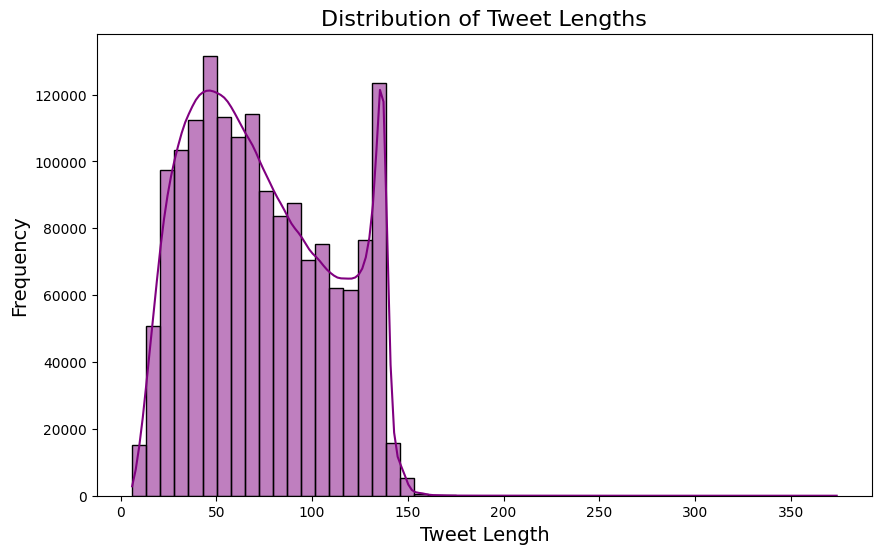

In [61]:
# Calculate tweet lengths
tweet_lengths = twitter_data['text'].apply(len)

# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))
sns.histplot(tweet_lengths, bins=50, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths', fontsize=16)
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


<ipython-input-62-1e23282d928b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='magma')


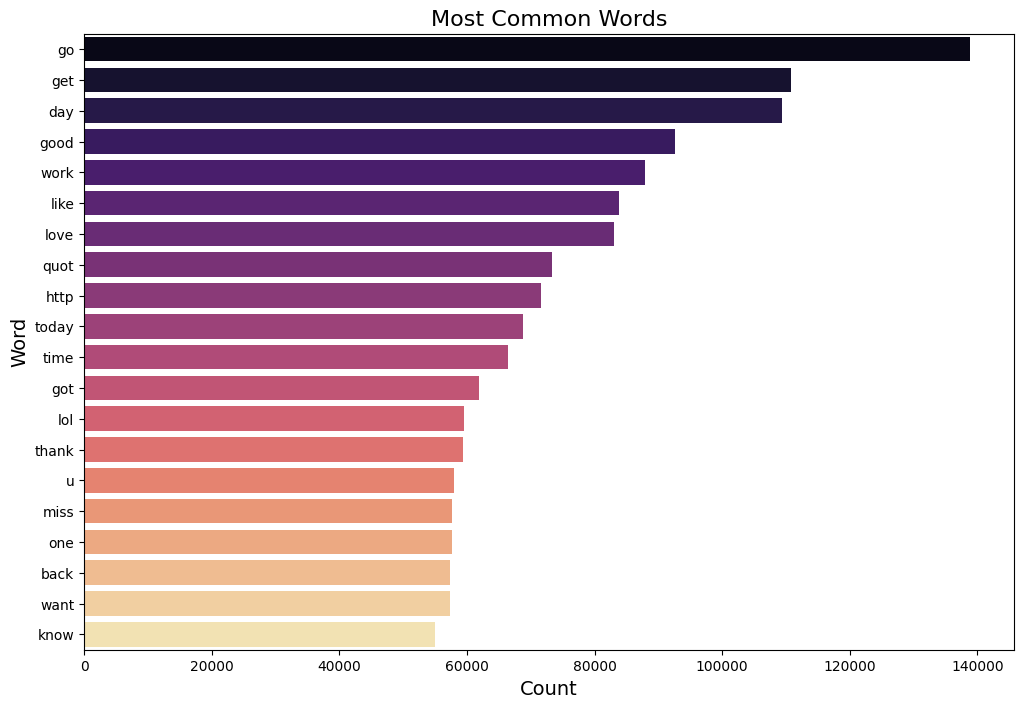

In [62]:
from collections import Counter

# Get all words in the dataset
all_words = ' '.join(twitter_data['stemmed_content']).split()

# Count the most common words
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='word', data=common_words_df, palette='magma')
plt.title('Most Common Words', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.show()


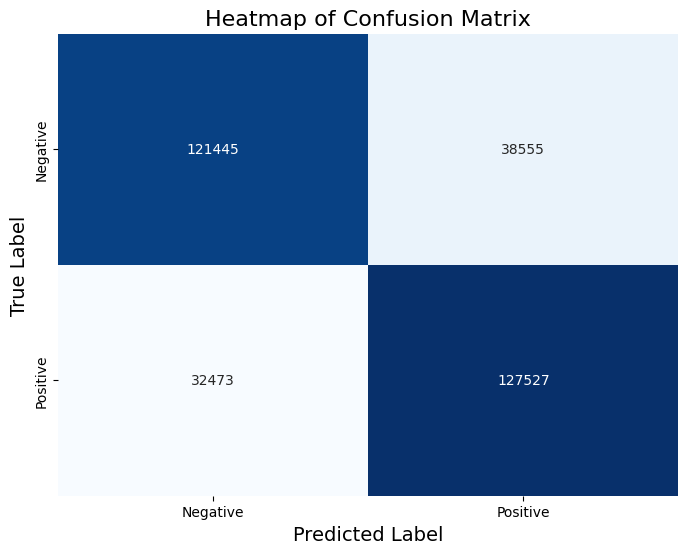

In [65]:
from sklearn.metrics import confusion_matrix

# Plot heatmap of confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Heatmap of Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()
